In [42]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [15]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=6, random_state=42)

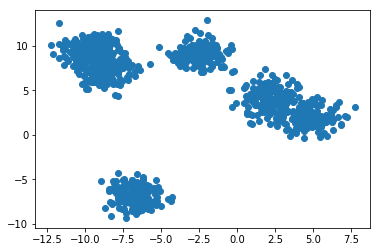

In [18]:
plt.scatter(X[:, 0], X[:, 1])

In [19]:
from sklearn.cluster import KMeans

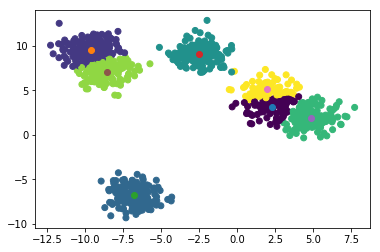

In [36]:
model = KMeans(7)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])

In [28]:
model.cluster_centers_

array([[ 3.31844751,  3.11782118],
       [-6.8114166 , -6.75205916],
       [-6.99232891,  8.63957864]])

In [80]:
class CustomKMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=20):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        
        procs = []
        
        for proc in range(self.n_init):
            
            clusters = []
            for i in range(self.n_clusters):
                clusters.append(Cluster(random.choice(X)))

            for iter in range(self.max_iter):

                labels = []
                error = 0

                for point in X:

                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append((distance, cluster))

                    best_index = np.array(distances)[:, 0].argmin()
                    best_cluster = distances[best_index][1]

                    best_cluster.points.append(point)
                    labels.append(best_index)
                    error += distances[best_index][0]


                for cluster in clusters:
                    cluster.reset_center()


            result = {"labels":labels, "clusters":clusters, "error" : error}

            procs.append((error, result))
        
        dict_index = np.array(procs)[:, 0].argmin()
        
        dict_best = procs[d]
        
        print(dict_best[0])
        
#         self.labels_ = dict_best["labels"]
#         self.clusters_ = dict_best["clusters"]
        

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center - point)**2)
        
        

In [81]:
m2 = CustomKMeans(6)

In [82]:
m2.fit(X)

TypeError: sorted expected 1 arguments, got 2

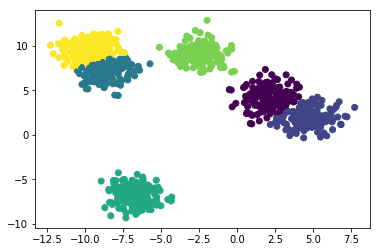

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=m2.lables_)

In [63]:
! push "L 7"

[master ad87a6c] L 7
 5 files changed, 560 insertions(+)
 create mode 100644 lecture_07/.ipynb_checkpoints/K Means-checkpoint.ipynb
 create mode 100644 lecture_07/.ipynb_checkpoints/image overlap-checkpoint.ipynb
 create mode 100644 lecture_07/K Means.ipynb
 create mode 100644 lecture_07/cb.png
 create mode 100644 lecture_07/image overlap.ipynb
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 4 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 438.57 KiB | 21.93 MiB/s, done.
Total 7 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/coding-blocks-archives/ML-Noida-2019-Aug.git
   28af8b8..ad87a6c  master -> master


In [79]:
sorted?